In [102]:
#import relevant libraries
import pandas as pd 
import numpy as np

#read in titanic data csv
df = pd.read_csv("data/titanic.csv") 

#display shape of dataset
print("dataframe shape" , df.shape)

#display first 5 rows of the data set
df.head()

dataframe shape (891, 14)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [103]:
df.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
Title           object
Family_Size      int64
dtype: object

In [104]:
df.Survived = df.Survived.astype(int);
# df.Survived = df.Survived.astype('category');
df.Age = df.Age.astype(int);
df.Cabin = df.Cabin.astype('category')
df.Embarked = df.Embarked.astype('category')
df.Title = df.Title.astype('category')
df.Sex = df.Sex.astype('category')
df.Pclass = df.Pclass.astype('category')
del df['Name']
del df['Ticket']
df['Cabin'] = df['Cabin'].cat.add_categories('None')
df['Cabin'].fillna('None', inplace =True) 
df.dtypes





Age               int64
Cabin          category
Embarked       category
Fare            float64
Parch             int64
PassengerId       int64
Pclass         category
Sex            category
SibSp             int64
Survived          int64
Title          category
Family_Size       int64
dtype: object

In [105]:
df.isna().sum()

Age            0
Cabin          0
Embarked       0
Fare           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Title          0
Family_Size    0
dtype: int64

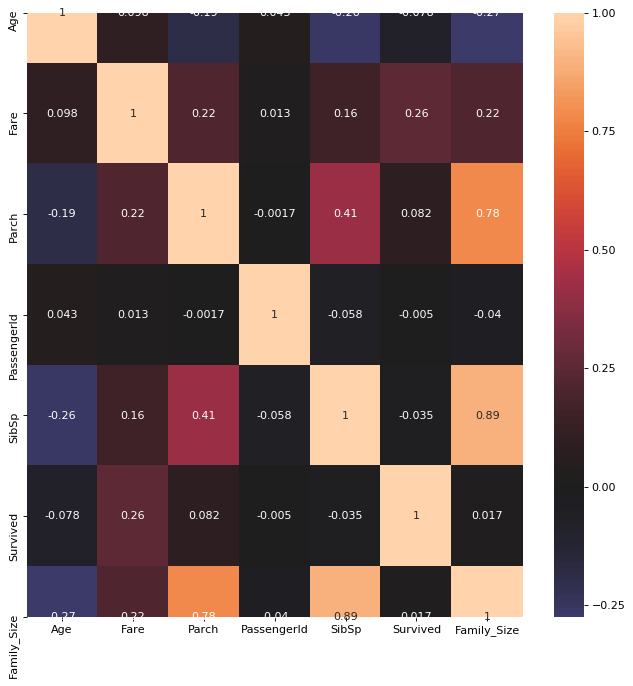

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, center=0, annot=True)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

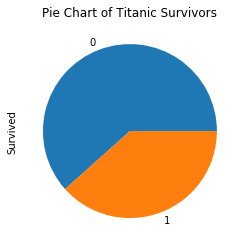

0    549
1    342
Name: Survived, dtype: int64

In [107]:
import matplotlib.pyplot as plt

survived = df.Survived.value_counts()

survived.plot(kind='pie', labels=df.Survived)
plt.title("Pie Chart of Titanic Survivors")

plt.show()

df.Survived.value_counts()

In [108]:
df.groupby("Survived").size()/df.shape[0]*100

Survived
0    61.616162
1    38.383838
dtype: float64

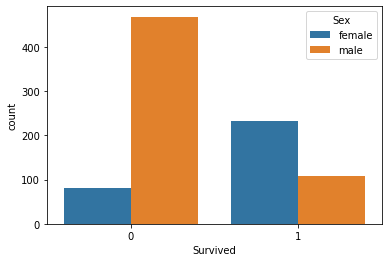

In [109]:
import seaborn as sns

sns.countplot(x='Survived', hue="Sex", data=df)

(0, 1)

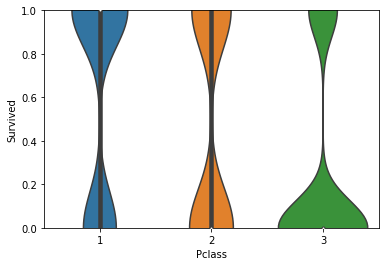

In [110]:
sns.violinplot("Pclass", "Survived", data =df).set_ylim(0, 1)

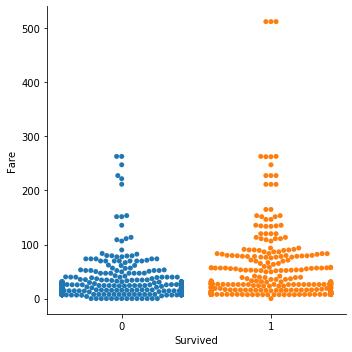

In [111]:
sns.catplot("Survived", "Fare", kind="swarm", data=df);

In [112]:
def return_median(X):
    return X.median();

def return_mode(X):
    return X.mode();


def return_mean(X):
    return X.mean();




In [113]:
median = return_median(df.Fare)
median

14.4542

In [114]:
mode = return_mode(df.Fare)
mode

0    8.05
dtype: float64

In [115]:
mean = return_mean(df.Fare)
mean

32.2042079685746

(0, 1)

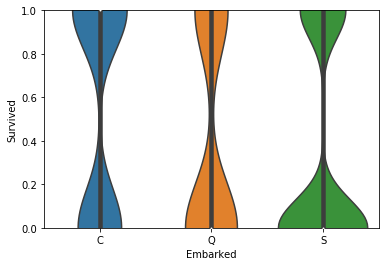

In [116]:
sns.violinplot("Embarked", "Survived", data =df).set_ylim(0, 1)

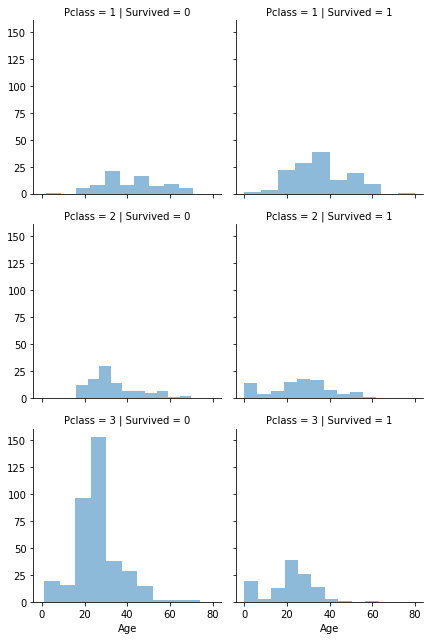

In [117]:
facetgrid = sns.FacetGrid(df, col='Survived', row='Pclass')
facetgrid.map(plt.hist, 'Age', alpha=.5)
facetgrid.add_legend();

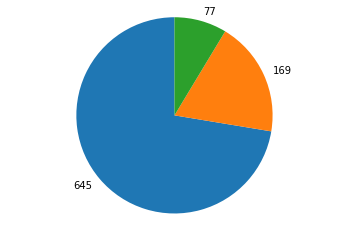

S    645
C    169
Q     77
Name: Embarked, dtype: int64

In [118]:
import matplotlib.pyplot as plt

patches, texts = plt.pie(df.Embarked.value_counts(), labels =  df.Embarked.value_counts(), startangle=90)
plt.axis('equal')
plt.show()

df.Embarked.value_counts()

Mr        525
Miss      185
Mrs       128
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

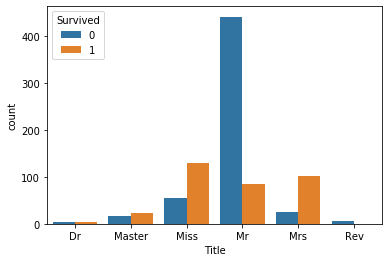

In [119]:
sns.countplot(x='Title', hue="Survived", data=df)

df.Title.value_counts()

In [120]:
def get_survival_rating(x , y ):
    return df[[x, y]].groupby([x], as_index=False).mean().sort_values(by=y, ascending=False)

In [121]:
survival_rating_pclass = get_survival_rating('Pclass' , 'Survived')
survival_rating_pclass

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [122]:
survival_rating = get_survival_rating('Title' , 'Survived')
survival_rating

,Title,Survived
4,Mrs,0.796875
2,Miss,0.702703
1,Master,0.575000
0,Dr,0.428571
3,Mr,0.160000
5,Rev,0.000000


In [123]:
survival_rating = get_survival_rating('Sex' , 'Survived')
survival_rating

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [124]:
def get_pearsonr_correlation(x , y ):
    return st.pearsonr(x, y)

In [125]:
correlation = get_pearsonr_correlation(df.Pclass, df.Fare)
correlation

(-0.5494996199439077, 1.9673861734207248e-71)

In [126]:
def calculate_degrees_freedom(x):
    return int(x.shape[0]) - 1

In [127]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [128]:
male_df = df.loc[df['Sex'] == 'male']
male_df.Survived.value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [129]:
male_df = df.loc[df['Sex'] == 'female']
male_df.Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [130]:
expected = [121, 193, 219, 352]
obs = [233, 81, 109, 468]

chi2, pvalue, _, _ = st.chi2_contingency([expected, obs])
print('pvalue', pvalue)

pvalue 5.804566182286662e-29


In [131]:
p_alpha = st.chi2.ppf(0.95, 3)

print('p(α)' , p_alpha)

p(α) 7.814727903251179


In [132]:
survived_df = df.loc[df['Survived'] == 1]
survived_fares = survived_df.Fare


died_df = df.loc[df['Survived'] == 0]
died_fares = died_df.Fare

print('average fares of those who survived', survived_fares[0:100].mean())
print('average fares of those who died',died_fares[0:100].mean())

st.ttest_ind(survived_fares[0:100],died_fares[0:100])

average fares of those who survived 38.34795700000001
average fares of those who died 27.129580999999995


Ttest_indResult(statistic=1.522879032297588, pvalue=0.1293844789478817)

In [133]:
correlation = get_pearsonr_correlation(df.Pclass, df.Survived)
correlation

(-0.33848103596101525, 2.537047387978631e-25)

In [134]:
slope, intercept, r_value, p_value, std_err = st.linregress(df.Age,df.Fare)
slope, intercept, r_value, p_value, std_err

predicted_fare = intercept + slope * 45
print('predicted fare is: ' ,predicted_fare)

predicted fare is:  37.906357147467716
